# Titanic Machine Learning Problem

## Import Libraries

In [106]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector, LeakyReLU, Dropout, Flatten, GlobalMaxPooling1D, Embedding
from keras.models import Model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine_df = [train_df,test_df]

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
combine_df

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

## Preprocessing Data

### Find Some Information About The Data

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Fix The Order From The Column

In [10]:
train_df = train_df[["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Survived"]]
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [11]:
combine_df = [train_df,test_df]
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch      

In [12]:
train_df.nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Survived         2
dtype: int64

In [13]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

### Feature Engineering

#### Drop The Unnecessary Features

In [14]:
train_df = train_df.drop(train_df[["Ticket"]], axis=1)
test_df = test_df.drop(test_df[["Ticket"]], axis=1)
combine_df = [train_df,test_df]
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     F

#### Find The Null Entry and Replacing It

In [15]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Age Feature

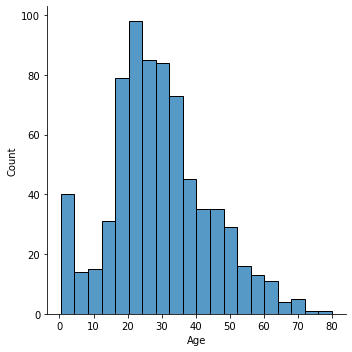

In [17]:
sns.displot(train_df["Age"])

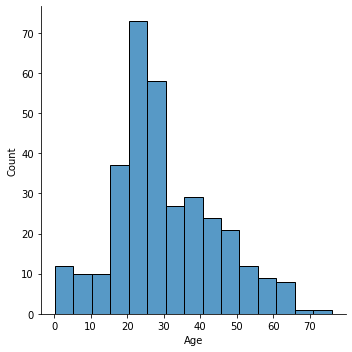

In [18]:
sns.displot(test_df["Age"])

In [19]:
round(np.mean(train_df["Age"]))

30

In [20]:
train_df["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [21]:
train_df["Age"].dropna().median()

28.0

In [22]:
round(np.mean(test_df["Age"]))

30

In [23]:
test_df["Age"].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [24]:
test_df["Age"].dropna().median()

27.0

In [25]:
for dataset in combine_df:
    dataset["Age"] = dataset["Age"].fillna(dataset["Age"].dropna().median())
    
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     F

In [26]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [27]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Fare Feature

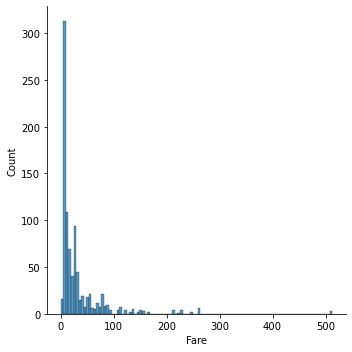

In [28]:
sns.displot(train_df["Fare"])

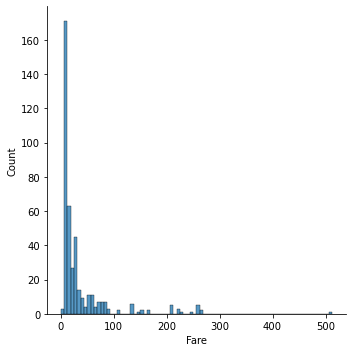

In [29]:
sns.displot(test_df["Fare"])

In [30]:
round(np.mean(train_df["Fare"]))

32

In [31]:
train_df["Fare"].mode()

0    8.05
Name: Fare, dtype: float64

In [32]:
train_df["Fare"].dropna().median()

14.4542

In [33]:
round(np.mean(test_df["Fare"]))

36

In [34]:
test_df["Fare"].mode()

0    7.75
Name: Fare, dtype: float64

In [35]:
test_df["Fare"].dropna().median()

14.4542

In [36]:
for dataset in combine_df:
    dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].dropna().median())
    
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     F

In [37]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [38]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

##### Embarked Feature

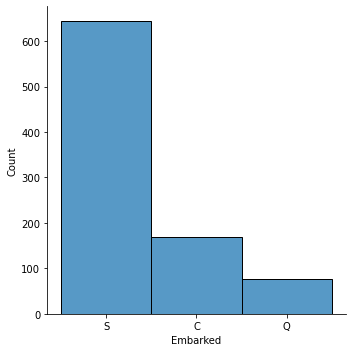

In [39]:
sns.displot(train_df["Embarked"])

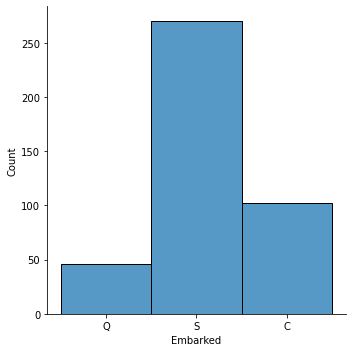

In [40]:
sns.displot(test_df["Embarked"])

In [41]:
train_df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [42]:
test_df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [43]:
dataset["Embarked"].mode()[0]

'S'

In [44]:
for dataset in combine_df:
    dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
    
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     F

In [45]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

In [46]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

##### Cabin Feature

In [47]:
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:
test_df["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [49]:
for dataset in combine_df:
    dataset["Cabin"] = dataset["Cabin"].fillna("N/A")
    
combine_df

[     PassengerId  Pclass                                               Name  \
 0              1       3                            Braund, Mr. Owen Harris   
 1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2              3       3                             Heikkinen, Miss. Laina   
 3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4              5       3                           Allen, Mr. William Henry   
 ..           ...     ...                                                ...   
 886          887       2                              Montvila, Rev. Juozas   
 887          888       1                       Graham, Miss. Margaret Edith   
 888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
 889          890       1                              Behr, Mr. Karl Howell   
 890          891       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     F

In [50]:
train_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [51]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Create New Feature

In [52]:
for dataset in combine_df:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
    
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [53]:
test_df["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [54]:
for dataset in combine_df:
    dataset["Title"] = dataset["Title"].replace(["Dr","Dona","Rev","Mlle","Major","Col","Countess","Capt","Ms","Sir","Lady","Mme","Don","Jonkheer"], "Rare Title")

train_df["Title"].value_counts()

Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: Title, dtype: int64

In [55]:
test_df["Title"].value_counts()

Mr            240
Miss           78
Mrs            72
Master         21
Rare Title      7
Name: Title, dtype: int64

In [56]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N/A,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N/A,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N/A,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,N/A,S,0,Rare Title
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,N/A,S,0,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,Mr


In [57]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,N/A,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,N/A,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,N/A,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,N/A,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,N/A,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,N/A,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,Rare Title
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,N/A,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,N/A,S,Mr


#### Drop Another Unnecessary Features

In [58]:
train_df = train_df.drop(["PassengerId","Name"], axis=1)
train_df = train_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked","Title","Survived"]]
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,male,22.0,1,0,7.2500,N/A,S,Mr,0
1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1
2,3,female,26.0,0,0,7.9250,N/A,S,Miss,1
3,1,female,35.0,1,0,53.1000,C123,S,Mrs,1
4,3,male,35.0,0,0,8.0500,N/A,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,N/A,S,Rare Title,0
887,1,female,19.0,0,0,30.0000,B42,S,Miss,1
888,3,female,28.0,1,2,23.4500,N/A,S,Miss,0
889,1,male,26.0,0,0,30.0000,C148,C,Mr,1


In [59]:
test_df = test_df.drop(["PassengerId","Name"], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,7.8292,N/A,Q,Mr
1,3,female,47.0,1,0,7.0000,N/A,S,Mrs
2,2,male,62.0,0,0,9.6875,N/A,Q,Mr
3,3,male,27.0,0,0,8.6625,N/A,S,Mr
4,3,female,22.0,1,1,12.2875,N/A,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,N/A,S,Mr
414,1,female,39.0,0,0,108.9000,C105,C,Rare Title
415,3,male,38.5,0,0,7.2500,N/A,S,Mr
416,3,male,27.0,0,0,8.0500,N/A,S,Mr


In [60]:
combine_df = [train_df,test_df]
combine_df

[     Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked       Title  \
 0         3    male  22.0      1      0   7.2500   N/A        S          Mr   
 1         1  female  38.0      1      0  71.2833   C85        C         Mrs   
 2         3  female  26.0      0      0   7.9250   N/A        S        Miss   
 3         1  female  35.0      1      0  53.1000  C123        S         Mrs   
 4         3    male  35.0      0      0   8.0500   N/A        S          Mr   
 ..      ...     ...   ...    ...    ...      ...   ...      ...         ...   
 886       2    male  27.0      0      0  13.0000   N/A        S  Rare Title   
 887       1  female  19.0      0      0  30.0000   B42        S        Miss   
 888       3  female  28.0      1      2  23.4500   N/A        S        Miss   
 889       1    male  26.0      0      0  30.0000  C148        C          Mr   
 890       3    male  32.0      0      0   7.7500   N/A        Q          Mr   
 
      Survived  
 0           0  
 1  

#### Transforming Features

In [62]:
temp = train_df.copy()

##### Age Feature

In [63]:
temp["AgeRange"] = pd.cut(temp["Age"], 5)
temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived,AgeRange
0,3,male,22.0,1,0,7.2500,N/A,S,Mr,0,"(16.336, 32.252]"
1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1,"(32.252, 48.168]"
2,3,female,26.0,0,0,7.9250,N/A,S,Miss,1,"(16.336, 32.252]"
3,1,female,35.0,1,0,53.1000,C123,S,Mrs,1,"(32.252, 48.168]"
4,3,male,35.0,0,0,8.0500,N/A,S,Mr,0,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,N/A,S,Rare Title,0,"(16.336, 32.252]"
887,1,female,19.0,0,0,30.0000,B42,S,Miss,1,"(16.336, 32.252]"
888,3,female,28.0,1,2,23.4500,N/A,S,Miss,0,"(16.336, 32.252]"
889,1,male,26.0,0,0,30.0000,C148,C,Mr,1,"(16.336, 32.252]"


In [64]:
temp[["AgeRange", "Survived"]].groupby(["AgeRange"], as_index=False).mean().sort_values(by="AgeRange", ascending=True)

,AgeRange,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [65]:
for dataset in combine_df:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4
    
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,male,1.0,1,0,7.2500,N/A,S,Mr,0
1,1,female,2.0,1,0,71.2833,C85,C,Mrs,1
2,3,female,1.0,0,0,7.9250,N/A,S,Miss,1
3,1,female,2.0,1,0,53.1000,C123,S,Mrs,1
4,3,male,2.0,0,0,8.0500,N/A,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,1.0,0,0,13.0000,N/A,S,Rare Title,0
887,1,female,1.0,0,0,30.0000,B42,S,Miss,1
888,3,female,1.0,1,2,23.4500,N/A,S,Miss,0
889,1,male,1.0,0,0,30.0000,C148,C,Mr,1


In [66]:
train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

In [67]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,male,1,1,0,7.2500,N/A,S,Mr,0
1,1,female,2,1,0,71.2833,C85,C,Mrs,1
2,3,female,1,0,0,7.9250,N/A,S,Miss,1
3,1,female,2,1,0,53.1000,C123,S,Mrs,1
4,3,male,2,0,0,8.0500,N/A,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,1,0,0,13.0000,N/A,S,Rare Title,0
887,1,female,1,0,0,30.0000,B42,S,Miss,1
888,3,female,1,1,2,23.4500,N/A,S,Miss,0
889,1,male,1,0,0,30.0000,C148,C,Mr,1


In [68]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,2,0,0,7.8292,N/A,Q,Mr
1,3,female,2,1,0,7.0000,N/A,S,Mrs
2,2,male,3,0,0,9.6875,N/A,Q,Mr
3,3,male,1,0,0,8.6625,N/A,S,Mr
4,3,female,1,1,1,12.2875,N/A,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,1,0,0,8.0500,N/A,S,Mr
414,1,female,2,0,0,108.9000,C105,C,Rare Title
415,3,male,2,0,0,7.2500,N/A,S,Mr
416,3,male,1,0,0,8.0500,N/A,S,Mr


##### Embarked Feature

In [69]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
for dataset in combine_df:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping).astype(int)

In [70]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,male,1,1,0,7.2500,N/A,1,Mr,0
1,1,female,2,1,0,71.2833,C85,2,Mrs,1
2,3,female,1,0,0,7.9250,N/A,1,Miss,1
3,1,female,2,1,0,53.1000,C123,1,Mrs,1
4,3,male,2,0,0,8.0500,N/A,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,1,0,0,13.0000,N/A,1,Rare Title,0
887,1,female,1,0,0,30.0000,B42,1,Miss,1
888,3,female,1,1,2,23.4500,N/A,1,Miss,0
889,1,male,1,0,0,30.0000,C148,2,Mr,1


In [71]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,2,0,0,7.8292,N/A,3,Mr
1,3,female,2,1,0,7.0000,N/A,1,Mrs
2,2,male,3,0,0,9.6875,N/A,3,Mr
3,3,male,1,0,0,8.6625,N/A,1,Mr
4,3,female,1,1,1,12.2875,N/A,1,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,1,0,0,8.0500,N/A,1,Mr
414,1,female,2,0,0,108.9000,C105,2,Rare Title
415,3,male,2,0,0,7.2500,N/A,1,Mr
416,3,male,1,0,0,8.0500,N/A,1,Mr


##### Sex Feature

In [72]:
sex_mapping = {"female": 0, "male": 1}
for dataset in combine_df:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping).astype(int)

In [73]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,1,1,1,0,7.2500,N/A,1,Mr,0
1,1,0,2,1,0,71.2833,C85,2,Mrs,1
2,3,0,1,0,0,7.9250,N/A,1,Miss,1
3,1,0,2,1,0,53.1000,C123,1,Mrs,1
4,3,1,2,0,0,8.0500,N/A,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,N/A,1,Rare Title,0
887,1,0,1,0,0,30.0000,B42,1,Miss,1
888,3,0,1,1,2,23.4500,N/A,1,Miss,0
889,1,1,1,0,0,30.0000,C148,2,Mr,1


In [74]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,2,0,0,7.8292,N/A,3,Mr
1,3,0,2,1,0,7.0000,N/A,1,Mrs
2,2,1,3,0,0,9.6875,N/A,3,Mr
3,3,1,1,0,0,8.6625,N/A,1,Mr
4,3,0,1,1,1,12.2875,N/A,1,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,N/A,1,Mr
414,1,0,2,0,0,108.9000,C105,2,Rare Title
415,3,1,2,0,0,7.2500,N/A,1,Mr
416,3,1,1,0,0,8.0500,N/A,1,Mr


##### Title Feature

In [75]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare Title": 4}
for dataset in combine_df:
    dataset["Title"] = dataset["Title"].map(title_mapping).astype(int)

In [76]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,1,1,1,0,7.2500,N/A,1,0,0
1,1,0,2,1,0,71.2833,C85,2,2,1
2,3,0,1,0,0,7.9250,N/A,1,1,1
3,1,0,2,1,0,53.1000,C123,1,2,1
4,3,1,2,0,0,8.0500,N/A,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,N/A,1,4,0
887,1,0,1,0,0,30.0000,B42,1,1,1
888,3,0,1,1,2,23.4500,N/A,1,1,0
889,1,1,1,0,0,30.0000,C148,2,0,1


In [77]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,2,0,0,7.8292,N/A,3,0
1,3,0,2,1,0,7.0000,N/A,1,2
2,2,1,3,0,0,9.6875,N/A,3,0
3,3,1,1,0,0,8.6625,N/A,1,0
4,3,0,1,1,1,12.2875,N/A,1,2
...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,N/A,1,0
414,1,0,2,0,0,108.9000,C105,2,4
415,3,1,2,0,0,7.2500,N/A,1,0
416,3,1,1,0,0,8.0500,N/A,1,0


##### Cabin Feature

In [78]:
cabin_unique_train = list(train_df["Cabin"].unique())
cabin_unique_test = list(test_df["Cabin"].unique())
cabin_unique = cabin_unique_train + cabin_unique_test
cabon_unique = set(cabin_unique)
cabin_unique

['N/A',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F

In [79]:
cabin_mapping = {}
for cabin in cabin_unique:
    if cabin != "N/A":
        if "A" in cabin:
            cabin_mapping[cabin] = 0
        elif "B" in cabin:
            cabin_mapping[cabin] = 1
        elif "C" in cabin:
            cabin_mapping[cabin] = 2
        elif "D" in cabin:
            cabin_mapping[cabin] = 3
        elif "E" in cabin:
            cabin_mapping[cabin] = 4
        elif "F" in cabin:
            cabin_mapping[cabin] = 5
        elif "G" in cabin:
            cabin_mapping[cabin] = 6
        else:
            cabin_mapping[cabin] = 7
    else:
        cabin_mapping[cabin] = 7

cabin_mapping

{'N/A': 7,
 'C85': 2,
 'C123': 2,
 'E46': 4,
 'G6': 6,
 'C103': 2,
 'D56': 3,
 'A6': 0,
 'C23 C25 C27': 2,
 'B78': 1,
 'D33': 3,
 'B30': 1,
 'C52': 2,
 'B28': 1,
 'C83': 2,
 'F33': 5,
 'F G73': 5,
 'E31': 4,
 'A5': 0,
 'D10 D12': 3,
 'D26': 3,
 'C110': 2,
 'B58 B60': 1,
 'E101': 4,
 'F E69': 4,
 'D47': 3,
 'B86': 1,
 'F2': 5,
 'C2': 2,
 'E33': 4,
 'B19': 1,
 'A7': 0,
 'C49': 2,
 'F4': 5,
 'A32': 0,
 'B4': 1,
 'B80': 1,
 'A31': 0,
 'D36': 3,
 'D15': 3,
 'C93': 2,
 'C78': 2,
 'D35': 3,
 'C87': 2,
 'B77': 1,
 'E67': 4,
 'B94': 1,
 'C125': 2,
 'C99': 2,
 'C118': 2,
 'D7': 3,
 'A19': 0,
 'B49': 1,
 'D': 3,
 'C22 C26': 2,
 'C106': 2,
 'C65': 2,
 'E36': 4,
 'C54': 2,
 'B57 B59 B63 B66': 1,
 'C7': 2,
 'E34': 4,
 'C32': 2,
 'B18': 1,
 'C124': 2,
 'C91': 2,
 'E40': 4,
 'T': 7,
 'C128': 2,
 'D37': 3,
 'B35': 1,
 'E50': 4,
 'C82': 2,
 'B96 B98': 1,
 'E10': 4,
 'E44': 4,
 'A34': 0,
 'C104': 2,
 'C111': 2,
 'C92': 2,
 'E38': 4,
 'D21': 3,
 'E12': 4,
 'E63': 4,
 'A14': 0,
 'B37': 1,
 'C30': 2,
 'D20'

In [80]:
for dataset in combine_df:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping).astype(int)

In [81]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,1,1,1,0,7.2500,7,1,0,0
1,1,0,2,1,0,71.2833,2,2,2,1
2,3,0,1,0,0,7.9250,7,1,1,1
3,1,0,2,1,0,53.1000,2,1,2,1
4,3,1,2,0,0,8.0500,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,7,1,4,0
887,1,0,1,0,0,30.0000,1,1,1,1
888,3,0,1,1,2,23.4500,7,1,1,0
889,1,1,1,0,0,30.0000,2,2,0,1


In [82]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,2,0,0,7.8292,7,3,0
1,3,0,2,1,0,7.0000,7,1,2
2,2,1,3,0,0,9.6875,7,3,0
3,3,1,1,0,0,8.6625,7,1,0
4,3,0,1,1,1,12.2875,7,1,2
...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,7,1,0
414,1,0,2,0,0,108.9000,2,2,4
415,3,1,2,0,0,7.2500,7,1,0
416,3,1,1,0,0,8.0500,7,1,0


##### Fare Feature

In [83]:
temp["FareRange"] = pd.cut(temp["Fare"], 3)
temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived,AgeRange,FareRange
0,3,male,22.0,1,0,7.2500,N/A,S,Mr,0,"(16.336, 32.252]","(-0.512, 170.776]"
1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1,"(32.252, 48.168]","(-0.512, 170.776]"
2,3,female,26.0,0,0,7.9250,N/A,S,Miss,1,"(16.336, 32.252]","(-0.512, 170.776]"
3,1,female,35.0,1,0,53.1000,C123,S,Mrs,1,"(32.252, 48.168]","(-0.512, 170.776]"
4,3,male,35.0,0,0,8.0500,N/A,S,Mr,0,"(32.252, 48.168]","(-0.512, 170.776]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,N/A,S,Rare Title,0,"(16.336, 32.252]","(-0.512, 170.776]"
887,1,female,19.0,0,0,30.0000,B42,S,Miss,1,"(16.336, 32.252]","(-0.512, 170.776]"
888,3,female,28.0,1,2,23.4500,N/A,S,Miss,0,"(16.336, 32.252]","(-0.512, 170.776]"
889,1,male,26.0,0,0,30.0000,C148,C,Mr,1,"(16.336, 32.252]","(-0.512, 170.776]"


In [84]:
temp[["FareRange", "Survived"]].groupby(["FareRange"], as_index=False).mean().sort_values(by="FareRange", ascending=True)

,FareRange,Survived
0,"(-0.512, 170.776]",0.376579
1,"(170.776, 341.553]",0.647059
2,"(341.553, 512.329]",1.000000


In [85]:
for dataset in combine_df:
    dataset.loc[dataset["Fare"] <= 171, "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 171) & (dataset["Fare"] <= 342), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 342, "Fare"] = 3
    
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,1,1,1,0,1.0,7,1,0,0
1,1,0,2,1,0,1.0,2,2,2,1
2,3,0,1,0,0,1.0,7,1,1,1
3,1,0,2,1,0,1.0,2,1,2,1
4,3,1,2,0,0,1.0,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,1.0,7,1,4,0
887,1,0,1,0,0,1.0,1,1,1,1
888,3,0,1,1,2,1.0,7,1,1,0
889,1,1,1,0,0,1.0,2,2,0,1


In [86]:
train_df["Fare"] = train_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

In [87]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,1,1,1,0,1,7,1,0,0
1,1,0,2,1,0,1,2,2,2,1
2,3,0,1,0,0,1,7,1,1,1
3,1,0,2,1,0,1,2,1,2,1
4,3,1,2,0,0,1,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,1,7,1,4,0
887,1,0,1,0,0,1,1,1,1,1
888,3,0,1,1,2,1,7,1,1,0
889,1,1,1,0,0,1,2,2,0,1


In [88]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,2,0,0,1,7,3,0
1,3,0,2,1,0,1,7,1,2
2,2,1,3,0,0,1,7,3,0
3,3,1,1,0,0,1,7,1,0
4,3,0,1,1,1,1,7,1,2
...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,1,7,1,0
414,1,0,2,0,0,1,2,2,4
415,3,1,2,0,0,1,7,1,0
416,3,1,1,0,0,1,7,1,0


## Find Correlation

In [89]:
train_df.corr().style.background_gradient(cmap='viridis')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
Pclass,1.000000,0.131900,-0.358769,0.083081,0.018443,-0.226414,0.742516,0.045702,-0.184841,-0.338481
Sex,0.131900,1.000000,0.070220,-0.114631,-0.245489,-0.064400,0.118975,-0.116569,-0.508099,-0.543351
Age,-0.358769,0.070220,1.000000,-0.218747,-0.135227,0.041129,-0.271178,-0.051334,-0.052375,-0.043800
SibSp,0.083081,-0.114631,-0.218747,1.000000,0.414838,0.016943,0.041082,-0.059961,0.258403,-0.035322
Parch,0.018443,-0.245489,-0.135227,0.414838,1.000000,0.103175,-0.031714,-0.078665,0.303608,0.081629
Fare,-0.226414,-0.064400,0.041129,0.016943,0.103175,1.000000,-0.249184,0.066170,-0.006199,0.105620
Cabin,0.742516,0.118975,-0.271178,0.041082,-0.031714,-0.249184,1.000000,-0.039367,-0.146536,-0.295382
Embarked,0.045702,-0.116569,-0.051334,-0.059961,-0.078665,0.066170,-0.039367,1.000000,0.051211,0.106811
Title,-0.184841,-0.508099,-0.052375,0.258403,0.303608,-0.006199,-0.146536,0.051211,1.000000,0.414088
Survived,-0.338481,-0.543351,-0.043800,-0.035322,0.081629,0.105620,-0.295382,0.106811,0.414088,1.000000


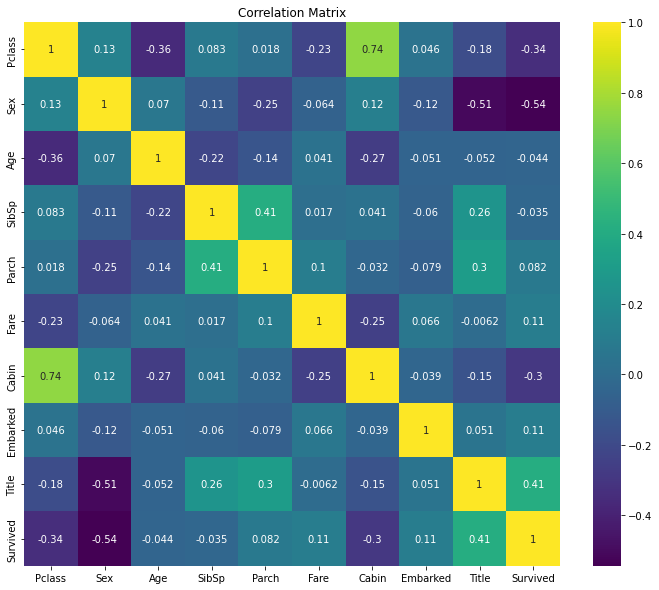

In [118]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

## Classification

### Train & Test Split Data

In [91]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
X,y

(     Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
 0         3    1    1      1      0     1      7         1      0
 1         1    0    2      1      0     1      2         2      2
 2         3    0    1      0      0     1      7         1      1
 3         1    0    2      1      0     1      2         1      2
 4         3    1    2      0      0     1      7         1      0
 ..      ...  ...  ...    ...    ...   ...    ...       ...    ...
 886       2    1    1      0      0     1      7         1      4
 887       1    0    1      0      0     1      1         1      1
 888       3    0    1      1      2     1      7         1      1
 889       1    1    1      0      0     1      2         2      0
 890       3    1    1      0      0     1      7         3      0
 
 [891 rows x 9 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Data split done")

Data split done


In [95]:
X_train.shape, X_test.shape

((712, 9), (179, 9))

### Find The Best Model

Extra Trees: 0.811448 (0.013040)
SVM: 0.818743 (0.010179)
Random Forest: 0.809203 (0.005723)
Gradient Boosting: 0.826038 (0.015872)
Adaboost: 0.819865 (0.011125)
Decision Tree: 0.800224 (0.018713)
Logistic Regression: 0.808081 (0.014018)


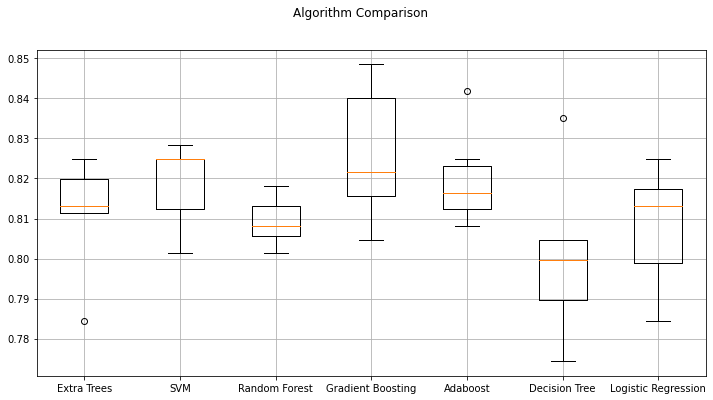

In [100]:
models = []
models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

### Hyperparameter Tuning

In [101]:
param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 5)

grid.fit(X_train, y_train) 
print(grid.best_params_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.615 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.615 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.620 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.620 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.613 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.768 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.739 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.817 total time=

### Predicting Survivor

In [103]:
classifier = GradientBoostingClassifier(learning_rate=grid.best_params_["learning_rate"], max_depth=grid.best_params_["max_depth"], n_estimators=grid.best_params_["n_estimators"])
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [104]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



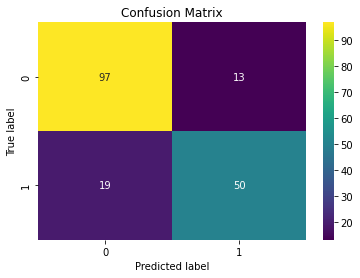

In [113]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [119]:
param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 5)

grid.fit(X, y) 
print(grid.best_params_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.615 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.804 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.803 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.753 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.787 total time=

In [124]:
prediction = classifier.predict(test_df)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [125]:
submission = pd.read_csv("test.csv")
submission = new_test[["PassengerId"]]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [126]:
submission["Survived"] = prediction
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### Export submission

In [127]:
submission.to_csv("submission.csv", index=False)